In [4]:
# Test migration history reconstruction on simulated data

import sys
import os

repo_dir = "/Users/divyakoyyalagunta/Desktop/Cornell_Research/Morris_Lab/metastatic_history_reconstruction_git/"
os.chdir(repo_dir)
sys.path.append(os.path.join(repo_dir, "metastatic_history_reconstruction/util"))
from src.lib import vertex_labeling

from src.util import machina_data_extraction_util as mach_util
from src.util import vertex_labeling_util as vert_util
import matplotlib
import torch

MACHINA_DATA_DIR = '/Users/divyakoyyalagunta/Desktop/Cornell_Research/Morris_Lab/machina/data/'


In [5]:
custom_colors = [matplotlib.colors.to_hex(c) for c in ['limegreen', 'royalblue', 'hotpink', 'grey', 'saddlebrown', 'darkorange', 'purple', 'red', 'black', 'black', 'black', 'black']]

def find_labeling(cluster_fn, tree_fn, ref_var_fn):
    cluster_label_to_idx = mach_util.get_cluster_label_to_idx(cluster_fn, ignore_polytomies=True)
    print(cluster_label_to_idx)
    idx_to_label = {v:k for k,v in cluster_label_to_idx.items()}
    
    T = torch.tensor(mach_util.get_adj_matrix_from_machina_tree(cluster_label_to_idx, tree_fn, skip_polytomies=True), dtype = torch.float32)
    B = vert_util.get_mutation_matrix_tensor(T)
    ref_matrix, var_matrix, unique_sites= mach_util.get_ref_var_matrices_from_machina_sim_data(ref_var_fn, 
                                                                                               cluster_label_to_idx=cluster_label_to_idx,
                                                                                               T=T)
    
    print(unique_sites)   
    primary_idx = unique_sites.index('P')
    r = torch.nn.functional.one_hot(torch.tensor([primary_idx]), num_classes=len(unique_sites)).T

    vertex_labeling.gumbel_softmax_optimization(T, ref_matrix, var_matrix, B, ordered_sites=unique_sites, 
                                                p=r, node_idx_to_label=idx_to_label, 
                                                w_e=0.01, w_l=3, w_m=10, max_iter=100, batch_size=64, 
                                                custom_colors=custom_colors, primary="prostate")

import pydot
from IPython.display import Image, display

def visualize_ground_truth(tree_fn, graph_fn):
    def view_pydot(pdot):
        plt = Image(pdot.create_png())
        display(plt)
    
    (graph,) = pydot.graph_from_dot_file(tree_fn)
    view_pydot(graph)

    (graph,) = pydot.graph_from_dot_file(graph_fn)
    view_pydot(graph)
        
        

{'0': 0, '2': 1, '12;34;71;74': 2, '43;49': 3, '52': 4, '15;22;42;44': 5, '46': 6, '47': 7, '16': 8, '54;59;60;82': 9, '67': 10, '77': 11, '65': 12, '83': 13, '69': 14, '70': 15, '55;75': 16, '61;64;68': 17, '18;27;35;37;38;45;50;57;72': 18, '10;13;20;25;26;30;40;53;56': 19, '6;21;23;28;29;36;41;58;63': 20, '3;4;7;8': 21, '5;9;11;14': 22}
['P', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7']


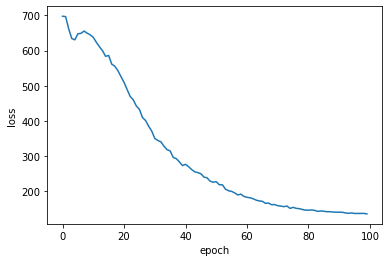

DEBUG:SGD:
Best tree
Migration number: 9.0
Comigration number: 8.0
Seeding site number: 3.0
Neg log likelihood: 1.125
L1: 8.0
Loss: 125.011
DEBUG:SGD:
U > 0.05

DEBUG:SGD:    norm     0     2  12;34  43;49    52  15;22    46    47    16  ...    83  \
P  0.000 0.000 0.000  0.793  0.000 0.000  0.000 0.000 0.000 0.000  ... 0.000   
M1 0.000 0.000 0.000  0.000  0.000 0.000  0.089 0.179 0.088 0.597  ... 0.000   
M2 0.000 0.000 0.000  0.000  0.000 0.126  0.000 0.000 0.000 0.000  ... 0.000   
M3 0.000 0.000 0.000  0.000  0.000 0.000  0.000 0.000 0.000 0.000  ... 0.000   
M4 0.000 0.000 0.000  0.000  0.000 0.000  0.000 0.000 0.000 0.000  ... 0.000   
M5 0.000 0.000 0.000  0.000  0.000 0.000  0.000 0.000 0.000 0.000  ... 0.000   
M6 0.000 0.000 0.000  0.000  0.000 0.000  0.000 0.000 0.000 0.000  ... 0.238   
M7 0.000 0.000 0.000  0.000  0.000 0.000  0.000 0.000 0.000 0.000  ... 0.000   

      69    70  55;75  61;64  18;27  10;13  6;21   3;4   5;9  
P  0.000 0.168  0.000  0.000  0.000  0.000 0.

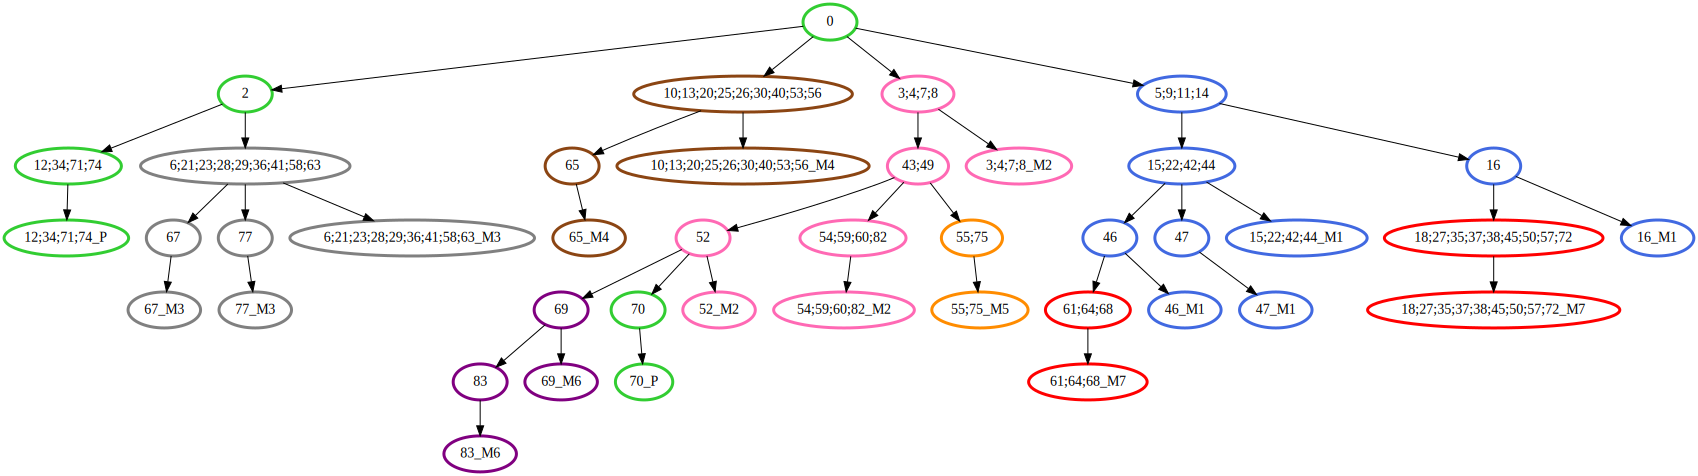

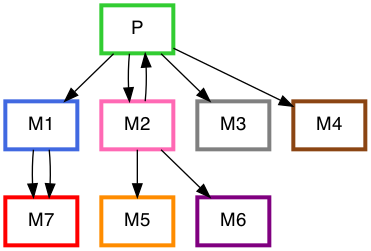

Ground truth


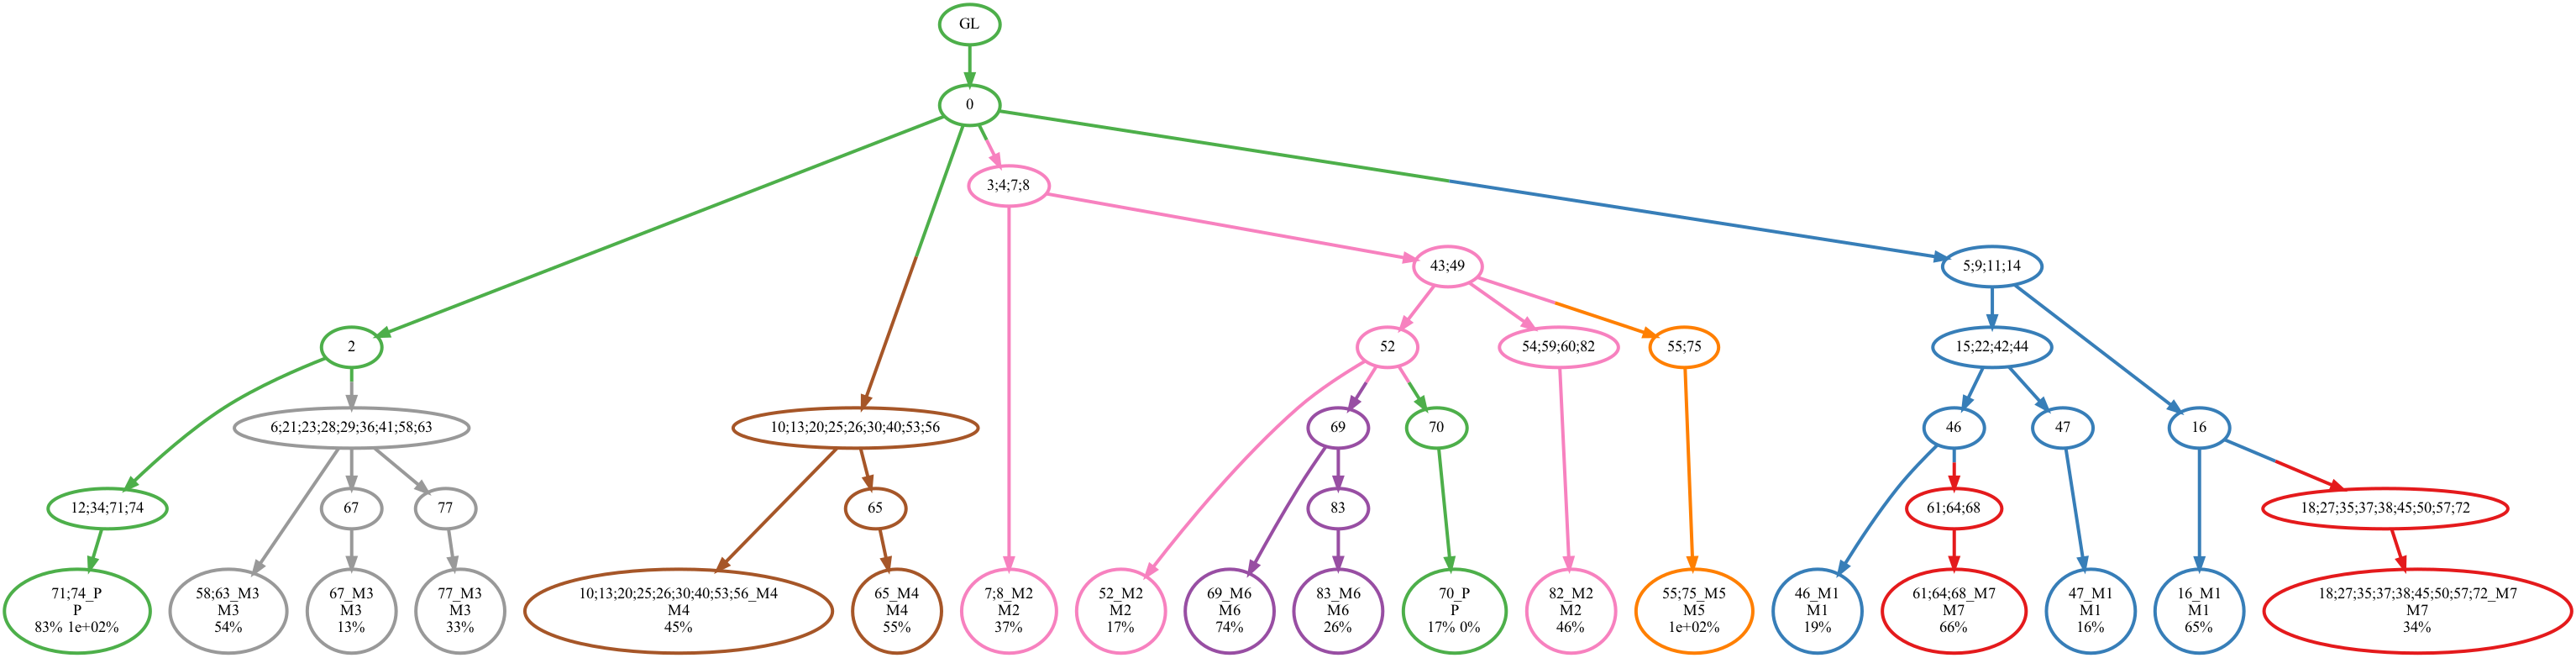

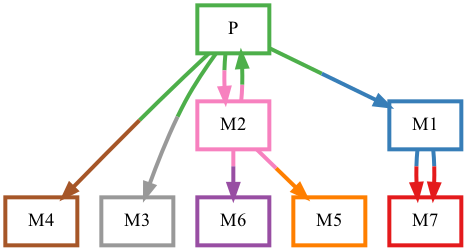

In [6]:
num_sites = "m8"
mig_type = "R"
SEED = "9"

SIM_DATA_DIR = os.path.join(MACHINA_DATA_DIR, "sims", num_sites, mig_type)

find_labeling(os.path.join(SIM_DATA_DIR, f"clustering_observed_seed{SEED}.txt"),
              os.path.join(SIM_DATA_DIR, f"T_seed{SEED}.tree"),
              os.path.join(SIM_DATA_DIR, f"seed{SEED}_0.95.tsv"))

print("Ground truth")
visualize_ground_truth(os.path.join(SIM_DATA_DIR, f"T_seed{SEED}.dot"), os.path.join(SIM_DATA_DIR, f"G_seed{SEED}.dot"))


In [ ]:
num_sites = "m5"
mig_type = "mS"
SEED = "5"

SIM_DATA_DIR = os.path.join(MACHINA_DATA_DIR, "sims", num_sites, mig_type)

find_labeling(os.path.join(SIM_DATA_DIR, f"clustering_observed_seed{SEED}.txt"),
              os.path.join(SIM_DATA_DIR, f"T_seed{SEED}.tree"),
              os.path.join(SIM_DATA_DIR, f"seed{SEED}_0.95.tsv"))

print("Ground truth")
visualize_ground_truth(os.path.join(SIM_DATA_DIR, f"T_seed{SEED}.dot"), os.path.join(SIM_DATA_DIR, f"G_seed{SEED}.dot"))
